<a href="https://colab.research.google.com/github/sjrk1436/Deep_Learning/blob/main/Classification_Using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classification Using Deep Learning

In [15]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [1]:
## Making Circular Dataset

from sklearn.datasets import make_circles

n_samples = 1000 # making 1000 samples
X,y = make_circles(n_samples, noise = 0.03, random_state = 42)

X,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

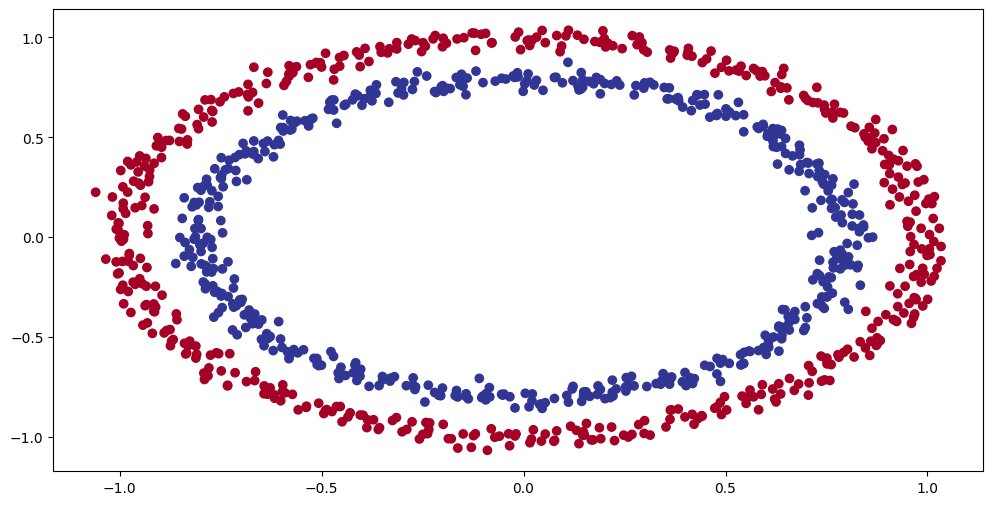

In [12]:
## Visualizing the following data

circles = pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "label":y})

plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [20]:
## Steps of Modelling

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)])

model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_1.fit(X, y, epochs=100, verbose=0)



32/32 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.5100


[0.6977745890617371, 0.5099999904632568]

In [35]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.5100


[0.6977745890617371, 0.5099999904632568]

In [23]:
## Plot Decision Boundary

def plot_decision_boundary(model, X, y):

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()]
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


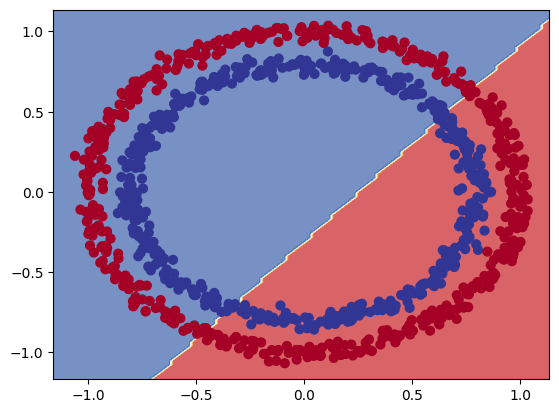

In [25]:
plot_decision_boundary(model_1, X, y)

In [30]:
## Train Test Split

X_train, X_test, y_train, y_test = X[:800], X[800:], y[:800], y[800:]

In [39]:
# Confusion Matrix

y_pred_1 = model_1.predict(X_test)
y_pred_1 = tf.round(y_pred_1)
confusion_matrix(y_test, y_pred_1)

7/7 [==============================] - 0s 2ms/step


array([[47, 54],
       [32, 67]])

In [43]:
## Evaluation Metrics

loss_1, accuracy_1 = model_1.evaluate(X_test, y_test)
print("Evaluation Metrics for Model_2")
print(f"loss: {loss_1}")
print(f"accuracy: {(accuracy_1*100):.2f}%")

7/7 [==============================] - 0s 5ms/step - loss: 0.6893 - accuracy: 0.5700
Evaluation Metrics for Model_2
loss: 0.6892786622047424
accuracy: 57.00%


In [27]:
## Using Non-Linearity for Model Improvement

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)])

model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_2.fit(X, y, epochs=100, verbose=0)

In [28]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.3534 - accuracy: 0.9980


[0.3533726930618286, 0.9980000257492065]

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


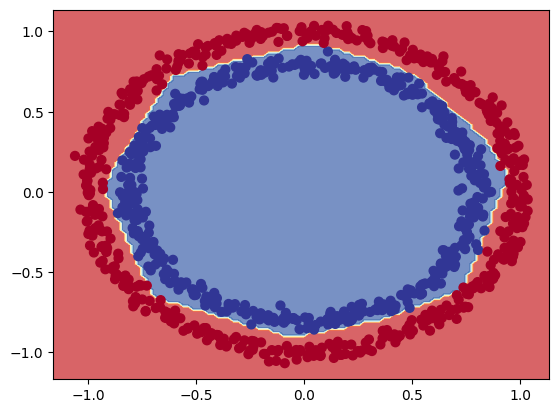

In [29]:
plot_decision_boundary(model_2, X, y)

In [40]:
# Confusion Matrix

y_pred_2 = model_2.predict(X_test)
y_pred_2 = tf.round(y_pred_2)
confusion_matrix(y_test, y_pred_2)

7/7 [==============================] - 0s 2ms/step


array([[101,   0],
       [  0,  99]])

In [42]:
## Evaluation Metrics

loss_2, accuracy_2 = model_2.evaluate(X_test, y_test)
print("Evaluation Metrics for Model_2")
print(f"loss: {loss_2}")
print(f"accuracy: {(accuracy_2*100):.2f}%")

7/7 [==============================] - 0s 13ms/step - loss: 0.3516 - accuracy: 1.0000
Evaluation Metrics for Model_2
loss: 0.35163965821266174
accuracy: 100.00%


Upon analyzing the evaluation metrics, it is evident that Model_2 outperforms Model_1 significantly. The results are as follows:

Model_1:

Loss: 0.6893
Accuracy: 57.00%
Model_2:

Loss: 0.3516
Accuracy: 100.00%
By comparing these metrics, it becomes apparent that Model_2 exhibits a lower loss value and achieves a flawless accuracy of 100%, thereby demonstrating its superior performance over Model_1.